In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(1)

# diabetes 데이터

# a) 데이터 로드 및 처리

In [2]:
#데이터 로드
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [3]:
"""
    sklearn에 있는 당뇨병 진행도 데이터를 사용

    <변수>
    Age
    Sex
    Body mass index
    Average blood pressure
    S1 : 혈청에 대한 6가지 지표들
    S2
    S3
    S4
    S5
    S6
    
    *데이터가 각 컬럼의 합이 1이 되도록 centering, scaling됨

    <데이터>
    diabetes에 data(설명변수), target(종속변수) 데이터가 따로 있음
"""

'\n    sklearn에 있는 당뇨병 진행도 데이터를 사용\n\n    <변수>\n    Age\n    Sex\n    Body mass index\n    Average blood pressure\n    S1 : 혈청에 대한 6가지 지표들\n    S2\n    S3\n    S4\n    S5\n    S6\n    \n    *데이터가 각 컬럼의 합이 1이 되도록 centering, scaling됨\n\n    <데이터>\n    diabetes에 data(설명변수), target(종속변수) 데이터가 따로 있음\n'

### 데이터가 각 컬럼의 합이 1이 되도록 centering, scaling됨

In [4]:
#설명변수
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
diabetes.target[:30]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283.])

In [7]:
#array형으로 되어있으므로 다루기 쉽게 데이터프레임으로 바꿔준다.
df_x = pd.DataFrame(diabetes.data)
df_x.columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']
df_x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
#종속변수
df_y = pd.DataFrame(diabetes.target, columns=['target'])
df_y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [9]:
df = pd.concat([df_x,df_y],axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
#442개의 관측치와 10개의 설명변수, 1개의 타겟변수로 이루어져있다.
df.shape

(442, 11)

# b) EDA

In [11]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [12]:
"""
    age: 이산형
    sex: 범주형(명목형)
    bmi: 연속형
    bp:  연속형
    s1~6:연속형
"""

'\n    age: 이산형\n    sex: 범주형(명목형)\n    bmi: 연속형\n    bp:  연속형\n    s1~6:연속형\n'

# <과제>

이산형 데이터의 unique한 값이 58개 밖에 없는데, 이를 적절하게 인코딩해보세요!

이 변수 그대로 사용해도 되고, 또는 (정확한 나이는 모르지만 ) 나이별 인코딩을 할 수 있을거에요 

In [13]:
"""순서형 인코딩 과제"""
len(df['age'].unique())

58

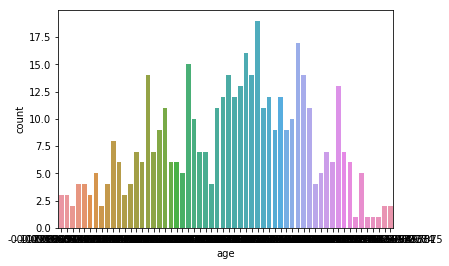

In [14]:
# 나이대 별로 잘라볼까 해서 데이터 찍어보기
sns.countplot('age',data = df)

In [15]:
# 분산도 고른 편이라 나이대별로 자르기도 애매하다. 이미 있는 데이터를 잃으면서까지 encoding 할 필요는 없어 보인다.
# 굳이 한다면,
unique_age = df['age'].unique()
age_dict= {}
for i, age in enumerate(unique_age):
    age_dict[age] = i

In [16]:
df['encoded_age'] = df['age'].map(age_dict)

In [17]:
df[['encoded_age']].head(20)

,encoded_age
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [18]:
#명목형 인코딩
s_dummy = pd.get_dummies(df.sex, columns=['sex0','sex1'])
s_dummy.columns=['sex0','sex1']
s_dummy.head()

,sex0,sex1
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [19]:
df.drop(['sex'], axis=1, inplace=True)

In [20]:
df = pd.concat([df, s_dummy],axis=1)
df.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target,encoded_age,sex0,sex1
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0,0,1
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,1,1,0
2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,2,0,1
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,3,1,0
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,4,1,0


In [21]:
df_x = df.drop(['target'],axis=1)
df_y = pd.DataFrame(df['target'])

In [22]:
print(df_x.columns.values)
print(df_y.columns.values)

['age' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'encoded_age' 'sex0'
 'sex1']
['target']


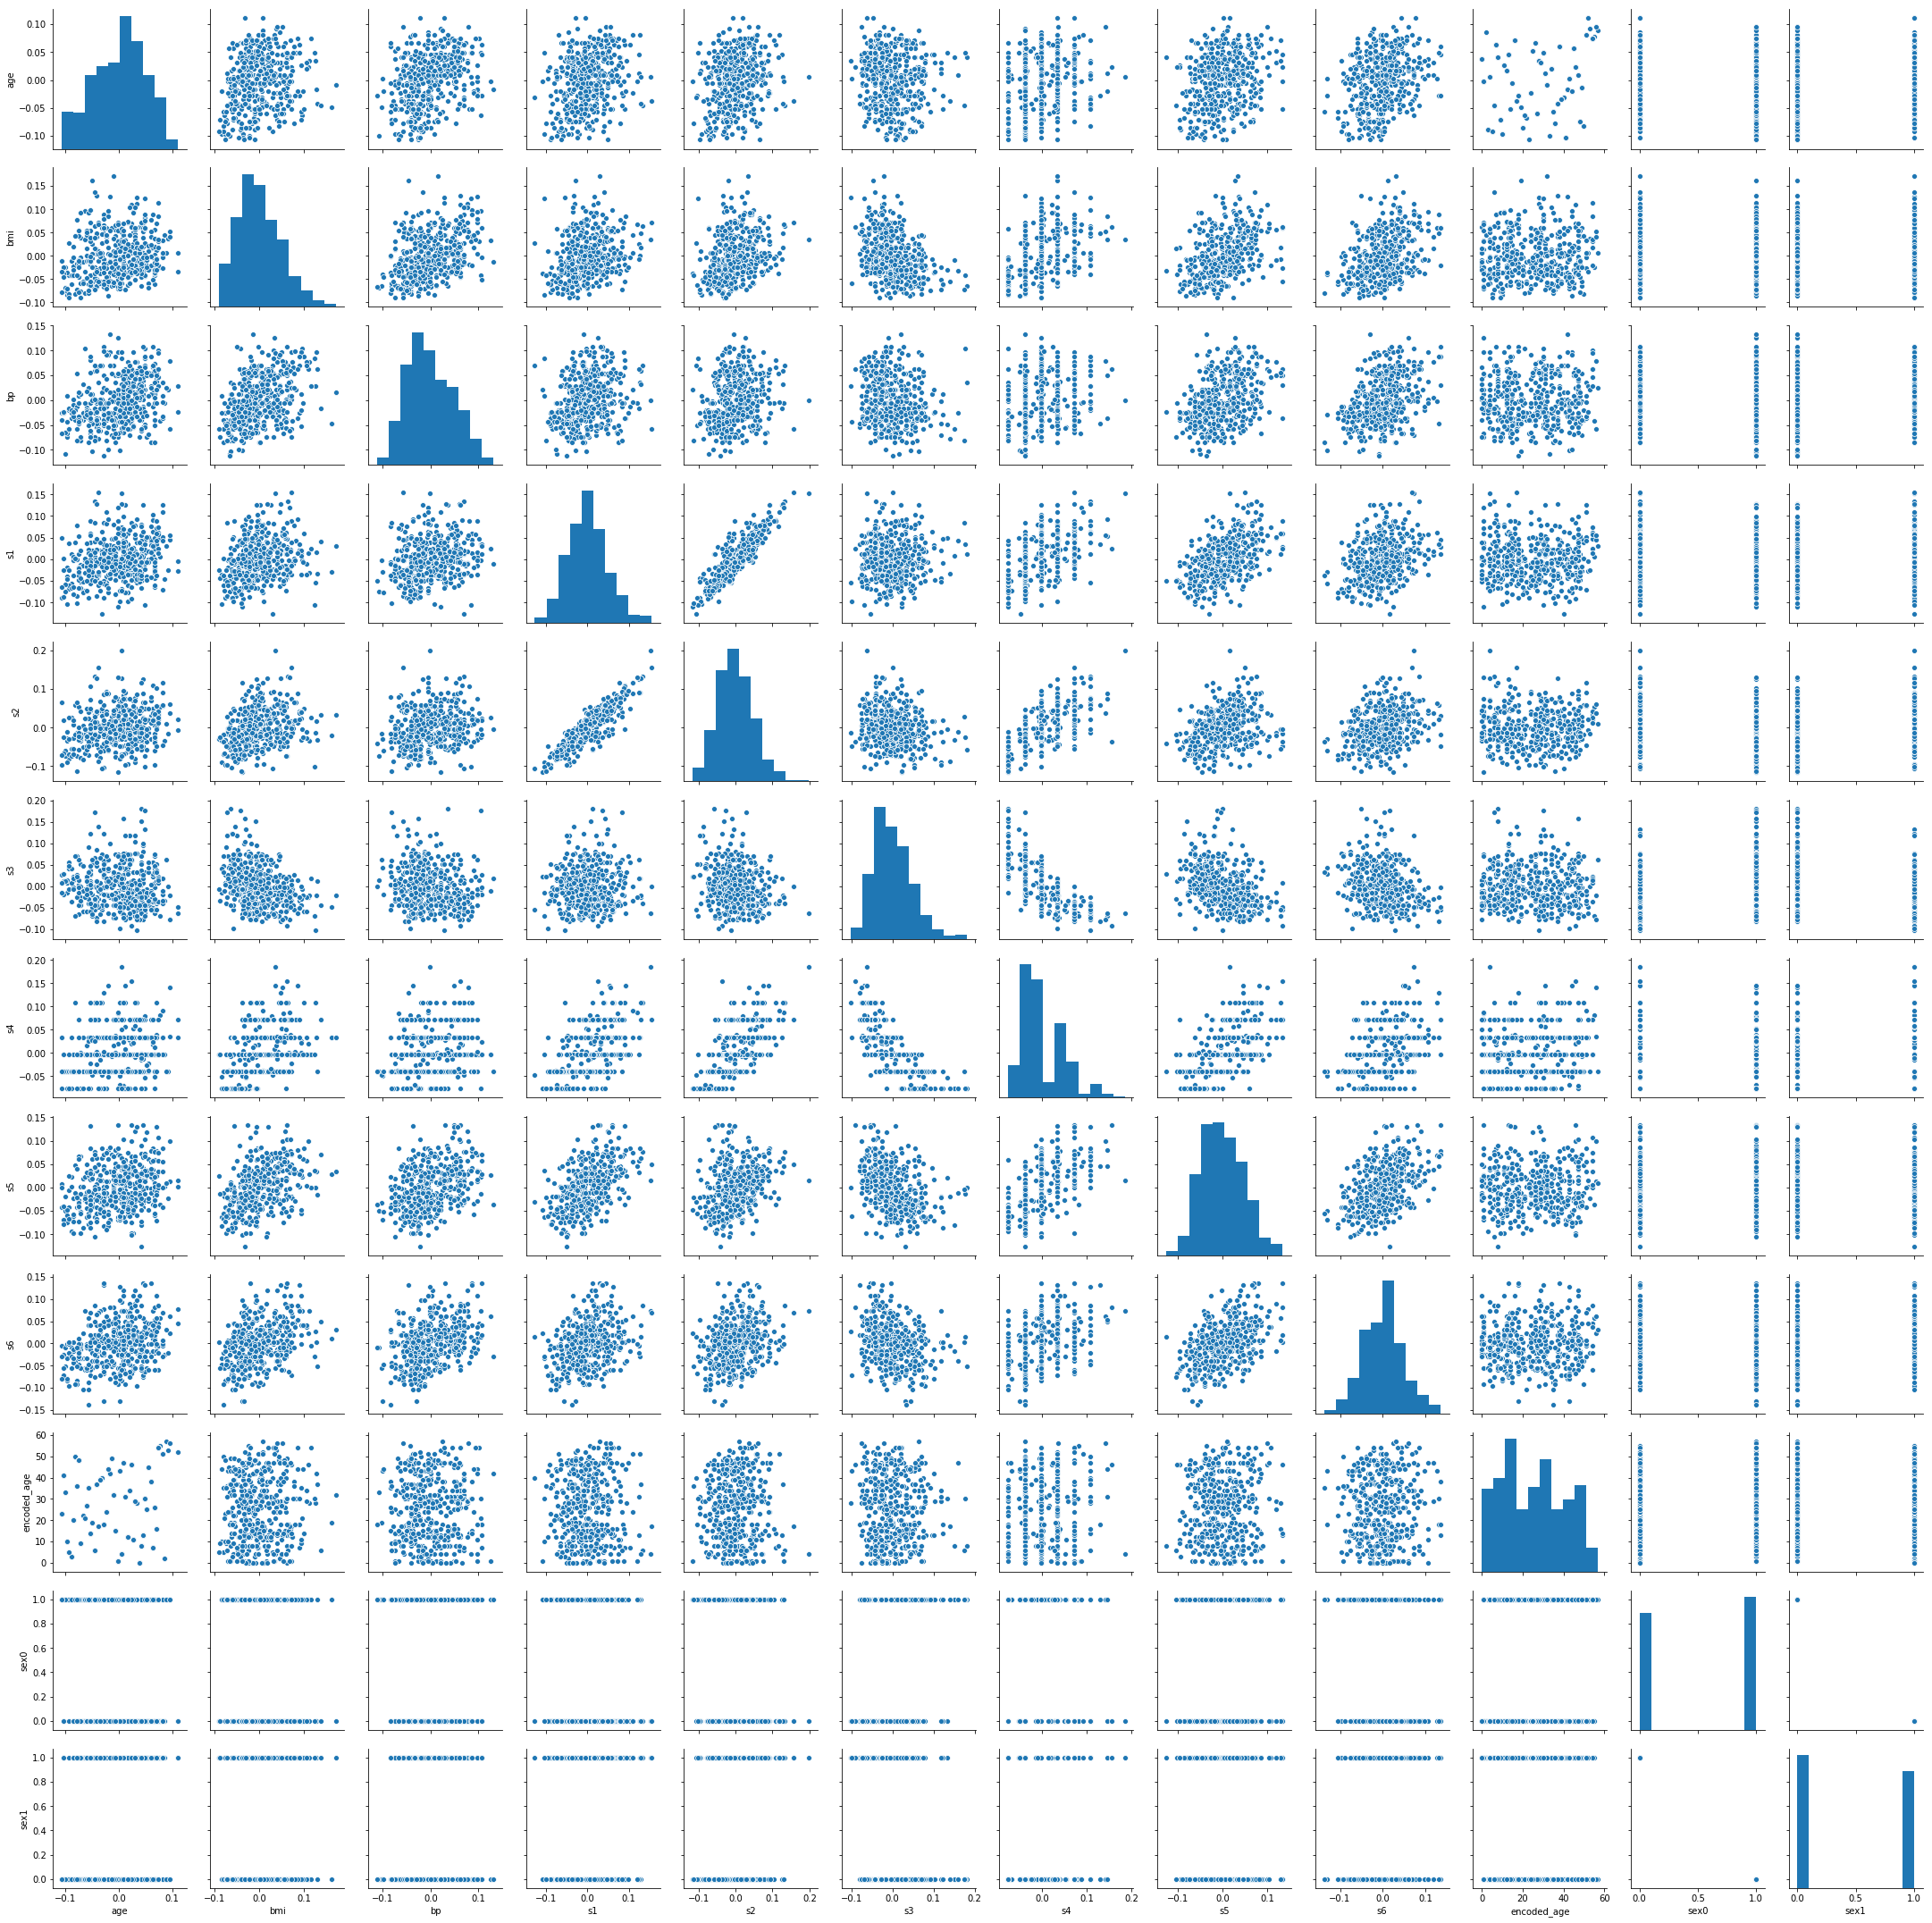

In [23]:
#산점도 행렬
sns.pairplot(df_x)

# s1과 s2의 선형관계가 두드러짐!(다른 s변수들도 살짝 보임)
# s4변수가 이상하게 줄무늬가 보인다
# s4변수의 특성으로 특정 구간의 시작(끝)에 많을 수도 있고, 데이터 기입의 오류일 수도 있겠다

In [24]:
#상관계수 행렬
df_x.corr()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,encoded_age,sex0,sex1
age,1.000000,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.082678,-0.173737,0.173737
bmi,0.185085,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.037948,-0.088161,0.088161
bp,0.335427,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.017036,-0.241013,0.241013
s1,0.260061,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.000383,-0.035277,0.035277
s2,0.219243,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,-0.006427,-0.142637,0.142637
s3,-0.075181,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.018126,0.379090,-0.379090
s4,0.203841,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.028624,-0.332115,0.332115
s5,0.270777,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.027025,-0.149918,0.149918
s6,0.301731,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.013220,-0.208133,0.208133
encoded_age,0.082678,0.037948,0.017036,0.000383,-0.006427,-0.018126,0.028624,0.027025,0.013220,1.000000,0.035016,-0.035016


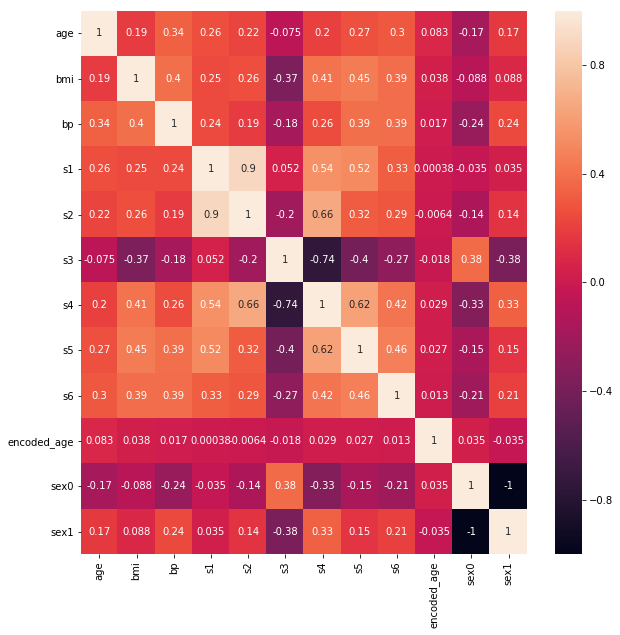

In [25]:
#상관계수 행렬
plt.figure(figsize=(10,10))
sns.heatmap(data = df_x.corr(), annot=True) # annotation 주석

In [26]:
df_x.values

array([[ 3.80759064e-02,  6.16962065e-02,  2.18723550e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.88201653e-03, -5.14740612e-02, -2.63278347e-02, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 8.52989063e-02,  4.44512133e-02, -5.67061055e-03, ...,
         2.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 4.17084449e-02, -1.59062628e-02,  1.72818607e-02, ...,
         8.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-4.54724779e-02,  3.90621530e-02,  1.21513083e-03, ...,
         6.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-4.54724779e-02, -7.30303027e-02, -8.14137658e-02, ...,
         6.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [27]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_x.values, i) for i in range(df_x.shape[1])] # 그냥 value와 차원 넣어주면 됨
vif["features"] = df_x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

#s1, s2, s3, s5의 vif가 10이상이므로 다중공선성이 있다고 판단된다.

,VIF Factor,features
3,59.203792,s1
4,39.203636,s2
5,15.404021,s3
7,10.077397,s5
6,8.910055,s4
10,2.696585,sex0
11,2.334385,sex1
1,1.510438,bmi
8,1.484937,s6
2,1.459448,bp


In [28]:
"""
    다중공선성 의심 변수: s1, s2, s3, s5
    이 변수들을 삭제할 수도 있고, 일부만 제거할 수도 있음
"""

'\n    다중공선성 의심 변수: s1, s2, s3, s5\n    이 변수들을 삭제할 수도 있고, 일부만 제거할 수도 있음\n'

# c) Modeling

In [29]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
#fit된 모델의 R-square
model.score(X_train, y_train)

0.5580807744166804

In [32]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2709.273152564279

In [33]:
print(model.coef_) #추정된 회귀계수(intercept제외) 
print(model.intercept_) #intercept 

[[-5.05478282e+01  5.64190625e+02  3.04820021e+02 -6.46920471e+02
   3.15298104e+02  1.23895140e+01  1.58995345e+02  7.27208276e+02
   4.50532825e+01  3.32296377e-01  1.11880323e+01 -1.11880323e+01]]
[143.34559853]


In [34]:
#test데이터 예측
model.predict(X_test)

array([[241.59215812],
       [256.62616052],
       [155.53776148],
       [127.94995041],
       [186.63839208],
       [265.4768794 ],
       [108.36465239],
       [191.9675543 ],
       [146.43422541],
       [240.80468458],
       [164.44946224],
       [179.84567141],
       [116.20305083],
       [ 98.32982868],
       [236.55680201],
       [ 87.38026662],
       [155.32714135],
       [ 58.11672191],
       [ 96.63067008],
       [218.57179294],
       [202.69172139],
       [163.23812145],
       [161.12762951],
       [149.32126153],
       [206.76299222],
       [162.54849738],
       [120.54243748],
       [ 79.84601241],
       [194.01418872],
       [166.74004854],
       [170.65817251],
       [ 89.59636739],
       [154.12862099],
       [146.26908724],
       [135.82414387],
       [191.93364264],
       [165.41962987],
       [190.88305463],
       [123.4327486 ],
       [207.78366753],
       [ 91.94185708],
       [168.54796114],
       [138.65169933],
       [183

In [35]:
#test데이터 R-square
model.score(X_test, y_test)

0.3023698123844607

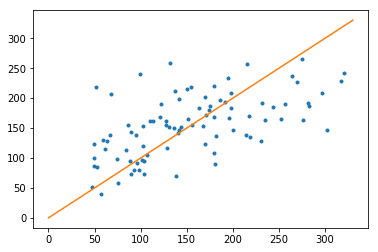

In [36]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [37]:
"""
    MSE: 2738
    train R-square: 0.55
    test R-square: 0.33
"""

'\n    MSE: 2738\n    train R-square: 0.55\n    test R-square: 0.33\n'

In [38]:
#다중공선성이 제일 큰 변수를 제거하고 다시하기
df2 = df.drop(['s1'],axis=1)
df2.head()

,age,bmi,bp,s2,s3,s4,s5,s6,target,encoded_age,sex0,sex1
0,0.038076,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0,0,1
1,-0.001882,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,1,1,0
2,0.085299,0.044451,-0.005671,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,2,0,1
3,-0.089063,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,3,1,0
4,0.005383,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,4,1,0


In [39]:
df2_x = df2.drop(['target'], axis=1)
df2_y = pd.DataFrame(df2['target'],columns=['target'])
df2_x.head()

,age,bmi,bp,s2,s3,s4,s5,s6,encoded_age,sex0,sex1
0,0.038076,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,0,0,1
1,-0.001882,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,1,1,0
2,0.085299,0.044451,-0.005671,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,2,0,1
3,-0.089063,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022692,-0.009362,3,1,0
4,0.005383,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031991,-0.046641,4,1,0


In [40]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2_x, df2_y, test_size=0.2, random_state=0)

In [41]:
#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)
#fit된 모델의 R-square
model.score(X_train, y_train)

0.5552453852573966

In [42]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

2726.656066186513

In [43]:
#test데이터 R-square
model.score(X_test, y_test)

0.29252208081974235

In [44]:
"""
    MSE: 2752
    train R-square: 0.55
    test R-square: 0.32
"""

'\n    MSE: 2752\n    train R-square: 0.55\n    test R-square: 0.32\n'

In [45]:
"""
    다중공선성이 가장 큰 S1변수를 제거하고 회귀한 결과,
    기존의 MSE, train R-square, test R-square과 거의 비슷하므로
    굳이 이 변수를 사용할 필요가 없다.
    
    하지만 모델의 accuracy를 높이는게 가장 큰 목적이면
    이 변수도 사용해서 정확도를 높이는게 좋다.
"""

'\n    다중공선성이 가장 큰 S1변수를 제거하고 회귀한 결과,\n    기존의 MSE, train R-square, test R-square과 거의 비슷하므로\n    굳이 이 변수를 사용할 필요가 없다.\n    \n    하지만 모델의 accuracy를 높이는게 가장 큰 목적이면\n    이 변수도 사용해서 정확도를 높이는게 좋다.\n'

In [46]:
#Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>

In [48]:
#R-square
ridge.score(X_train,y_train)

0.47634241341611383

In [49]:
#정규화를 덜하니까 R-square가 오히려 증가했다.
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

0.5379069263437504

In [50]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.531262193276691

In [51]:
"""
    정규화를 많이하니까 오히려 R-square가 감소했다.
    overfitting의 문제는 아니고, 모델이 단순해서 설명력이 부족한 것같다.
    더 복잡한 모델(다항회귀, DT 등)이 필요해보인다.
"""

'\n    정규화를 많이하니까 오히려 R-square가 감소했다.\n    overfitting의 문제는 아니고, 모델이 단순해서 설명력이 부족한 것같다.\n    더 복잡한 모델(다항회귀, DT 등)이 필요해보인다.\n'

# 숙제2

In [52]:
# ??? 값이 이상하게 나옴

In [74]:
#데이터 로드
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [75]:
len(diabetes.data[0])

10

In [76]:
x = diabetes.data
y = diabetes.target

In [77]:
#(A'A)-1A'B = X'
ata_inv = np.linalg.inv(np.matmul(np.transpose(x),x))

In [78]:
atb = np.matmul(np.transpose(x),y)

In [79]:
x_hat = np.matmul(ata_inv,atb)

In [80]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [81]:
x_hat.shape

(10,)

In [82]:
y_hat = np.matmul(x_hat,np.transpose(x))

In [83]:
y_hat

array([ 5.39835856e+01, -8.40611366e+01,  2.47505762e+01,  1.47844814e+01,
       -2.36736418e+01, -4.57843944e+01, -7.82393047e+01, -3.32796975e+01,
        6.67684660e+00,  6.14506048e+01, -5.50549483e+01, -5.70318619e+01,
       -3.70667512e+01,  1.25425661e+01, -4.90583047e+01,  2.50388858e+01,
        5.96260479e+01,  3.07107593e+01, -4.13360812e+00, -2.81164589e+01,
       -3.18025378e+01, -6.63297052e+01, -3.90206211e+01,  1.00315864e+02,
        1.33547264e+01, -4.41160793e+00, -5.50052434e+01,  2.69599456e+01,
       -2.30785109e+01,  3.26479014e+01,  6.58167329e+00, -8.26576002e+01,
        1.09369074e+02, -3.93145098e+01, -7.37615365e+01, -6.44672429e+01,
        5.57911180e+01,  5.74337621e+00,  8.87102227e+01, -1.51997573e+01,
        1.34839242e+00, -7.79764513e+01, -6.50242611e+00, -7.43054737e+01,
        6.89451803e+01, -2.69112439e+01, -9.53201350e+00, -4.26408518e+01,
       -7.89931131e+01,  3.77402033e+01,  5.80288365e+00,  1.74246811e+01,
       -1.79516220e+01,  

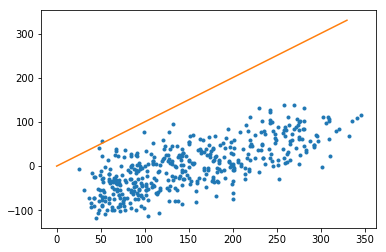

In [84]:
# 예측 vs. 실제데이터 plot
plt.plot(y, y_hat, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

## 값이 이상하다?
#### intercept columns 추가해줘야 함
#### sklearn에 default (fit_intercept=True)


In [64]:
import numpy as np
from numpy.linalg import inv 

def estimate_beta(x, y):
    """구현해야 하는 부분"""
    ata_inv = np.linalg.inv(np.matmul(np.transpose(x),x))
    atb = np.matmul(np.transpose(x),y)
    beta_hat = np.matmul(ata_inv,atb)
    return beta_hat

In [65]:
pd_x = pd.DataFrame(x)
pd_x[10] = 1

In [66]:
x_beta = estimate_beta(pd_x,y)

In [67]:
y_hat = np.matmul(x_beta,np.transpose(pd_x))

In [71]:
y_hat

array([  0.        ,   3.33333333,   6.66666667,  10.        ,
        13.33333333,  16.66666667,  20.        ,  23.33333333,
        26.66666667,  30.        ,  33.33333333,  36.66666667,
        40.        ,  43.33333333,  46.66666667,  50.        ,
        53.33333333,  56.66666667,  60.        ,  63.33333333,
        66.66666667,  70.        ,  73.33333333,  76.66666667,
        80.        ,  83.33333333,  86.66666667,  90.        ,
        93.33333333,  96.66666667, 100.        , 103.33333333,
       106.66666667, 110.        , 113.33333333, 116.66666667,
       120.        , 123.33333333, 126.66666667, 130.        ,
       133.33333333, 136.66666667, 140.        , 143.33333333,
       146.66666667, 150.        , 153.33333333, 156.66666667,
       160.        , 163.33333333, 166.66666667, 170.        ,
       173.33333333, 176.66666667, 180.        , 183.33333333,
       186.66666667, 190.        , 193.33333333, 196.66666667,
       200.        , 203.33333333, 206.66666667, 210.  

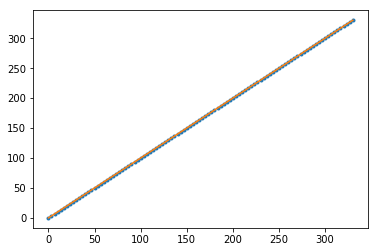

In [72]:
# 예측 vs. 실제데이터 plot
plt.plot(y, y_hat, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [70]:
"""
    <reference>
    https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial
"""

'\n    <reference>\n    https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial\n'